In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df.drop(columns=['customerID'],inplace=True)

# Data exploration
#### 1. We noticed that the data type of 'total charges' was object so we need to inspect this feature.

In [89]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [90]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

####   We can see that the values are string instead of float hence the data type is object, we will now have to change the data type from string to float. We will also have to tackle the spaces otherwise we 'pd.to_numeic' function will not work.
#### Therefore, we will use the 'errors=coerce' parameter in pd.to_numeric function so it will ignore the columns which have erros and leave them empty.

In [91]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() #Isnull() function will return a boolean value and tell us whether a the data is null or not

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [92]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [93]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [94]:
df.shape

(7043, 20)

#### If we drop 11 columns out of 7043 which dont have any value for 'TotalCharges', our dataset will not be compromised

In [95]:
new_df=df[df.TotalCharges!=' ']
new_df.shape

(7032, 20)

In [96]:
new_df.dtypes #We have removed the rows which had space in the TotalCharges value, but our data type is still an object. We have to now convert it to numeric datatype.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [97]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\2869248855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges)


In [98]:
new_df.TotalCharges.dtypes

dtype('float64')

In [99]:
new_df[new_df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [100]:
new_df[new_df.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

# Vizaualization
#### We will now visualize how some features like Monthly Charges and tenure affect customer churn

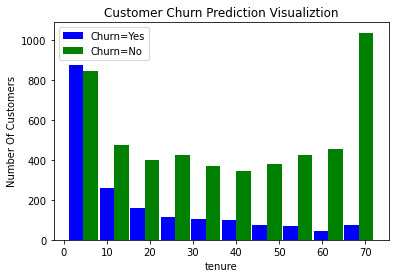

In [101]:
tenure_churn_no = new_df[new_df.Churn=='No'].tenure
tenure_churn_yes = new_df[new_df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

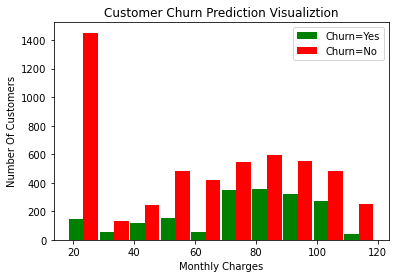

In [102]:
mc_churn_no = new_df[new_df.Churn=='No'].MonthlyCharges      
mc_churn_yes = new_df[new_df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


#### We will find all the unique values in the object type of columns

In [103]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [104]:

print_unique_col_values(new_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [105]:
new_df.replace('No internet service','No',inplace = True)
new_df.replace('No phone service','No',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\2067820362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('No internet service','No',inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11536\2067820362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('No phone service','No',inplace=True)


In [106]:
print_unique_col_values(new_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [107]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    new_df[col].replace({'Yes':1, 'No':0},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\4259938425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col].replace({'Yes':1, 'No':0},inplace=True)


In [108]:
new_df['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11536\1049276071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['gender'].replace({'Female':1,'Male':0},inplace=True)


### One hot encoding for categorical columns

In [109]:
new_df2=pd.get_dummies(data=new_df,columns=['InternetService','Contract','PaymentMethod'])

In [110]:
new_df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6370,1,0,0,0,45,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1974,0,0,1,0,11,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
230,0,0,0,0,54,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3989,1,0,0,1,8,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3567,1,0,1,1,14,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [111]:
new_df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling
#### Scaling is one of the most important steps in data preprocessing.
#### We now need to figure out which columns to scale.
#### All the columns are in the range of 0 to 1 except 'MonthlyCharges','TotalCharges',Tenure, hence we need to scale them.

In [112]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

new_df2[cols_to_scale]= scaler.fit_transform(new_df2[cols_to_scale])

In [113]:
for col in new_df2:
    print(f'{col}:{new_df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

# Test-Train-Split


In [114]:
X = new_df2.drop('Churn',axis='columns')
y = new_df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [115]:
X_train.shape

(5625, 26)

In [116]:
X_test.shape

(1407, 26)

In [117]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [118]:
len(X_train.columns)

26

In [119]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [120]:
import tensorflow as tf
from tensorflow import keras

In [121]:
y_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64) 
x_tensor=tf.convert_to_tensor(X_train, dtype=tf.int64)

In [125]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7115
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7925
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8036
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8064
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8110
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4019 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8382
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8352
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8379
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8386
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8348
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8380
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8382
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8361
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8425
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 

In [127]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7768


[0.4860348701477051, 0.7768301367759705]

In [128]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.49912283],
       [0.5356838 ],
       [0.00309209],
       [0.68299574],
       [0.41048533]], dtype=float32)

In [131]:
# I will convert this 2D array into a 1D array and then will change the values as 0 and 1 for predictions less than or greater than 0.5
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [135]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       999
           1       0.63      0.56      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

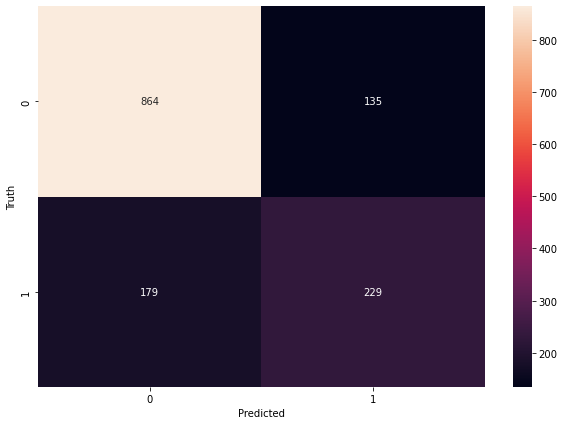

In [137]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#  Accuracy

In [148]:
round((862+229)/(862+229+135+179),2)

0.78

# Precision for 0 class. i.e. Precision for customers who did not churn

In [142]:
round(862/(862+179),2)

0.83

# Precision for 1 class. i.e. Precision for customers who actually churned

In [149]:
round(229/(229+135),2)

0.63

# Recall for 0 class

In [150]:
round(862/(862+135),2)

0.86

In [147]:
round(229/(229+179),2)

0.56